# 1. Introduction 
The Titanic dataset is a binary classification problem where the goal is to predict which passenger survived the Titanic shipwreck. We'll use machine learning algorithms like Logistic Regression, SVM, & KNN to make predictions based on passenger data sucah as age, class, gender, etc. 

# 2. Data Overview 
We begin by loading and inspecting the training & test datasets to understand their structure and identify any missing or inconsistant data.

In [2]:
import pandas as pd 
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
train.info()
train.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# 3. Exploratory Data Analysis (EDA)
We explore the distribution of features and their relationship with survival outcomes 

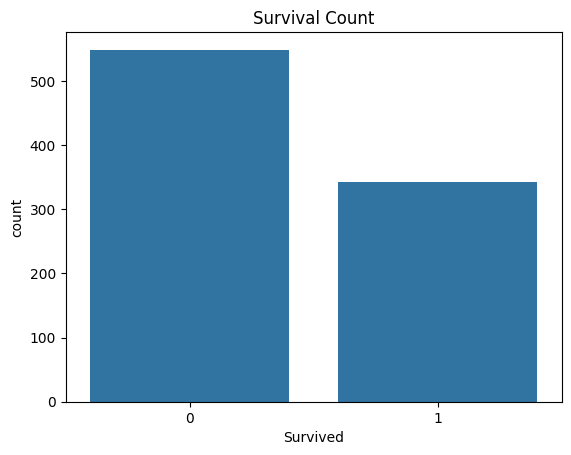

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="Survived", data = train)
plt.title("Survival Count")
plt.show()

# 4. Feature Engineering
Let's extract useful features such as titles from names, family size, deck information from cabin, and more

In [4]:
train["Title"] = train["Name"].str.extract(r'([A-Za-z]+)\.', expand=False)
test["Title"] = test["Name"].str.extract(r'([A-Za-z]+)\.', expand=False)

train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1

train["IsAlone"] = (train["FamilySize"] == 1).astype(int)
test["IsAlone"] = (test["FamilySize"] == 1).astype(int)

# 5 . Data Preprocessing
This step invloves imputting missing values, encoding categorical variables, and scaling numerical features if required

In [5]:
from sklearn.preprocessing import LabelEncoder

train["Age"].fillna(train["Age"].median(), inplace=True)
test["Age"].fillna(train["Age"].median(), inplace=True)
train["Embarked"].fillna(train["Embarked"].mode()[0], inplace=True)
test["Fare"].fillna(test["Fare"].median(),inplace=True)

# Label encode 'Sex'
le_sex = LabelEncoder()
train["Sex"] = le_sex.fit_transform(train["Sex"])
test["Sex"] = le_sex.transform(test["Sex"])

# Label encode 'Embarked'
le_embarked = LabelEncoder()
train["Embarked"] = le_embarked.fit_transform(train["Embarked"])
test["Embarked"] = le_embarked.transform(test["Embarked"])

/tmp/ipykernel_2875/1654034793.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train["Age"].fillna(train["Age"].median(), inplace=True)
/tmp/ipykernel_2875/1654034793.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

# 6. Model Building 
We'll train multiple machine learning models and compare their performance 

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

features = ["Pclass", "Sex", "Age", "Fare", "FamilySize", "IsAlone", "Embarked"]
x = train[features]
y = train["Survived"]

X_train, X_val, Y_train, Y_val = train_test_split(x, y, test_size=0.2, random_state=42)

# Logistic Regression 
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, Y_train)
log_pred = log_reg.predict(X_val)

# KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)
knn_pred = knn.predict(X_val)

#SVM
svm = SVC()
svm.fit(X_train, Y_train)
svm_pred = svm.predict(X_val)

# 7. Model Evaluation 
We compare the performance of different models on validation data.

In [9]:
print(f"Logistic Regression Acuuracy : {accuracy_score(Y_val, log_pred)}")
print(f"KNN accuracy : {accuracy_score(Y_val, knn_pred)}")
print(f"SVM Accuracy : {accuracy_score(Y_val, svm_pred)}")

Logistic Regression Acuuracy : 0.7988826815642458
KNN accuracy : 0.7094972067039106
SVM Accuracy : 0.664804469273743


# 8. Final Model and Prediction 
We train the best model on the full dataset and generate predictions for the test set

In [10]:
final_model = LogisticRegression(max_iter=1000)
final_model.fit(x, y)
X_test = test[features]
predictions = final_model.predict(X_test)

# 9. Submission 
We create a submisson file with the rqeuired format

In [11]:
submission = pd.DataFrame({
    "PassengerID": test["PassengerId"],
    "Survived": predictions})

submission.to_csv("Submission.csv", index=False)

# 10. Conclusion 
We succesfully built and tested musltiple models for predicting Titanic survival. Logistic Regression provided solid results. Further improvements can be made by hyperparameter turning or using ensemble methods like Random Forest or XGBoost